https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

1. Plot formatting

* Setting the plot style
* General plot style arguments
* Controlling the legend
* Controlling the labels
* Scales
* Plotting on a secondary y-axis
* Custom formatters for timeseries plots
* Suppressing tick resolution adjustment
* Automatic date tick adjustment
* Subplots
* Using layout and targeting multiple axes
* Plotting with error bars
* Plotting tables
* Colormaps

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,6

## Plot formatting

### Setting the plot style

In [2]:
# import matplotlib
# matplotlib.style.available

### General plot style arguments

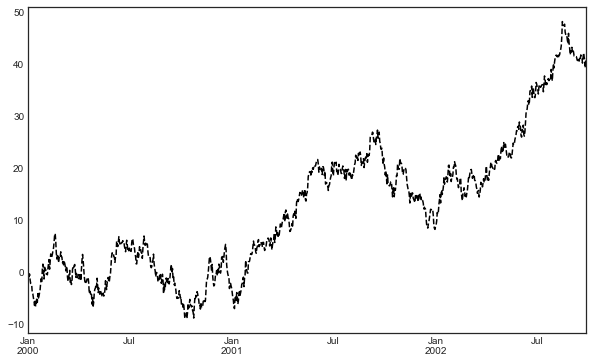

In [3]:
ts = pd.Series(
    np.random.randn(1000), 
    index=pd.date_range('1/1/2000', periods=1000)
).cumsum()

ts.plot(
    style="k--", 
    label="Series"
)
plt.show()

### Controlling the legend

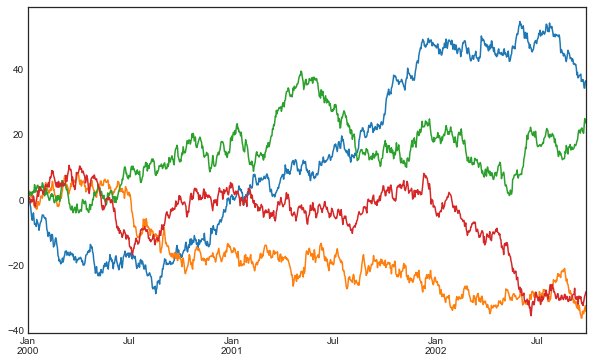

In [4]:
df = pd.DataFrame(
    np.random.randn(1000, 4), 
    index=ts.index, 
    columns=list("ABCD")
).cumsum()

df.plot(legend=False)
plt.show()

### Controlling the labels

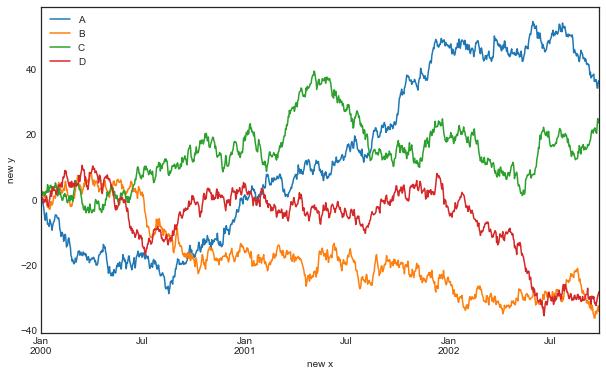

In [5]:
df.plot(
    xlabel="new x", 
    ylabel="new y"
)
plt.show()

### Scales

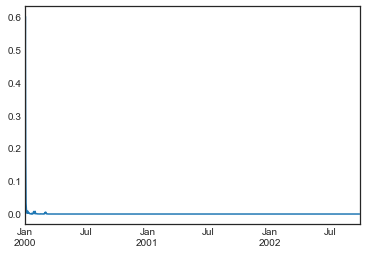

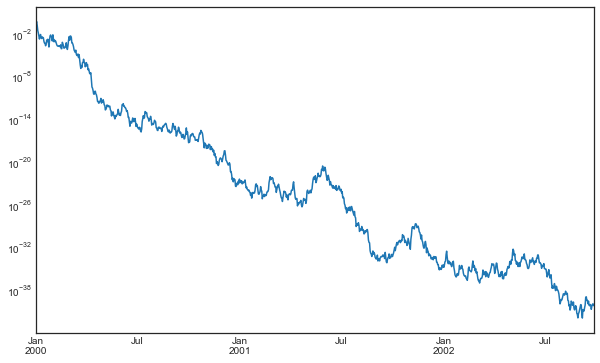

In [6]:
ts = pd.Series(
    np.random.randn(1000), 
    index=pd.date_range("1/1/2000", periods=1000)
)
ts = np.exp(ts.cumsum())

plt.figure(figsize=(6,4))
ts.plot()
plt.show()

ts.plot(logy=True)
plt.show()

# See also the "logx" and "loglog" keyword arguments.

### Plotting on a secondary y-axis

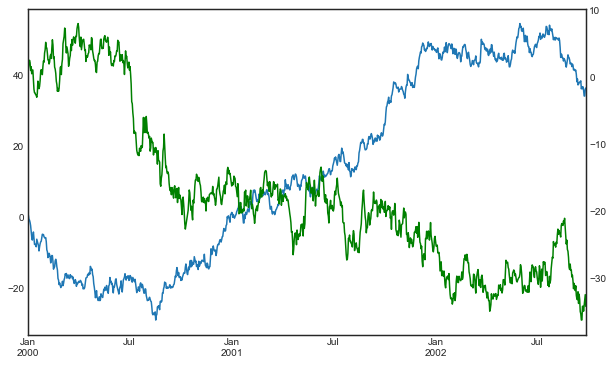

In [7]:
df["A"].plot()
df["B"].plot(
    secondary_y=True, 
    style="g"
)
plt.show()

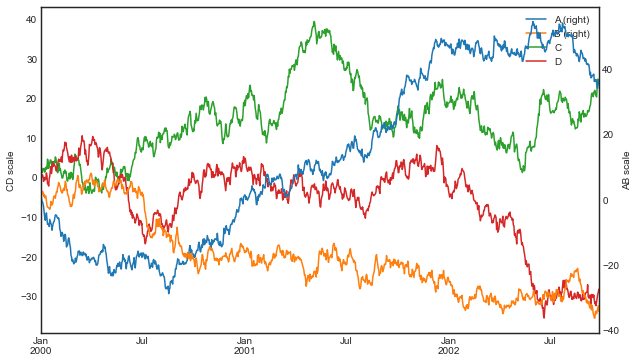

In [8]:
ax = df.plot(
    secondary_y=["A", "B"]
)
ax.set_ylabel("CD scale")
ax.right_ax.set_ylabel("AB scale")
plt.show()

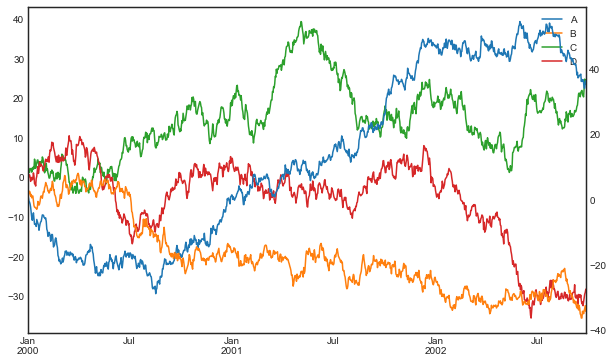

In [9]:
# Note that the columns plotted on the secondary y-axis is automatically marked with “(right)” in the legend. 
# To turn off the automatic marking, use the mark_right=False keyword.

df.plot(
    secondary_y=["A", "B"], 
    mark_right=False
)
plt.show()

### Custom formatters for timeseries plots

In [10]:
# pd.options.plotting.matplotlib.register_converters = True
# or
# pandas.plotting.register_matplotlib_converters()

### Suppressing tick resolution adjustment

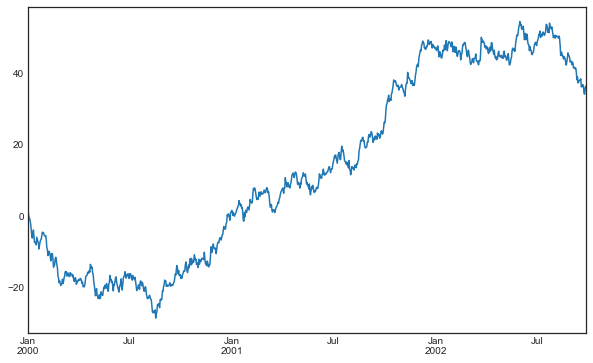

In [11]:
df["A"].plot()
plt.show()

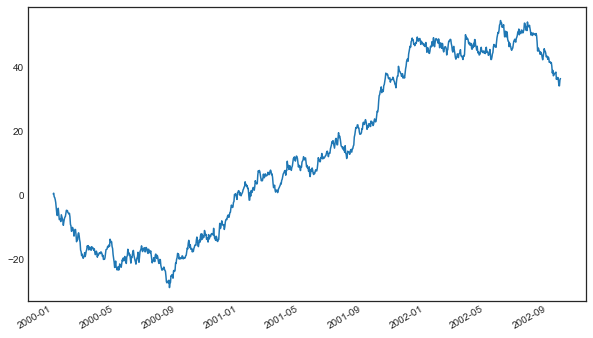

In [12]:
df["A"].plot(x_compat=True)
plt.show()

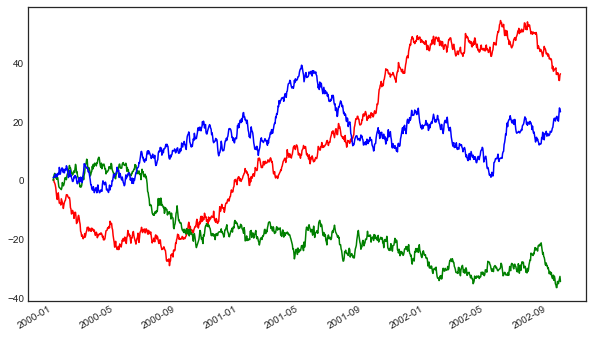

In [13]:
with pd.plotting.plot_params.use("x_compat", True):
    df["A"].plot(color="r")
    df["B"].plot(color="g")
    df["C"].plot(color="b")

### Automatic date tick adjustment

https://matplotlib.org/2.0.2/users/recipes.html#fixing-common-date-annoyances

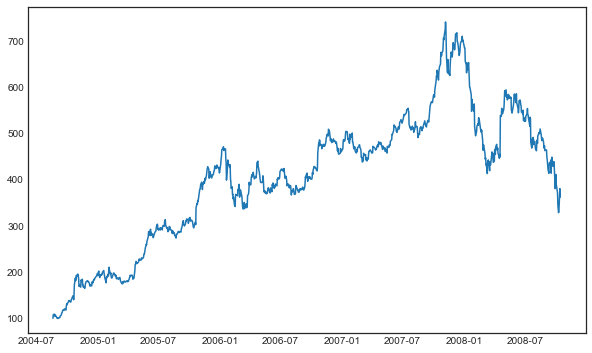

In [14]:
r = np.load("goog.npy", allow_pickle=True, encoding="bytes").view(np.recarray)

plt.plot(r.date, r.close)
plt.show()

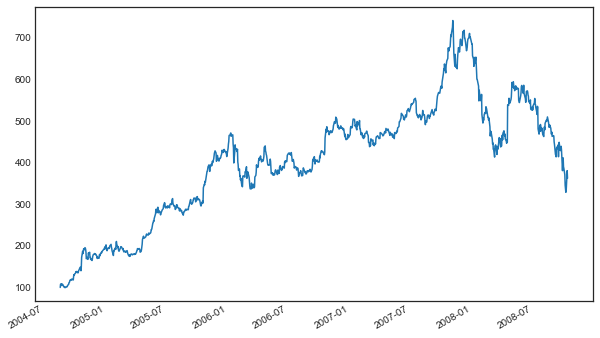

In [15]:
# plt.close('all')

fig, ax = plt.subplots(1)
ax.plot(r.date, r.close)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the toolbar
import matplotlib.dates as mdates

ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()

### Subplots

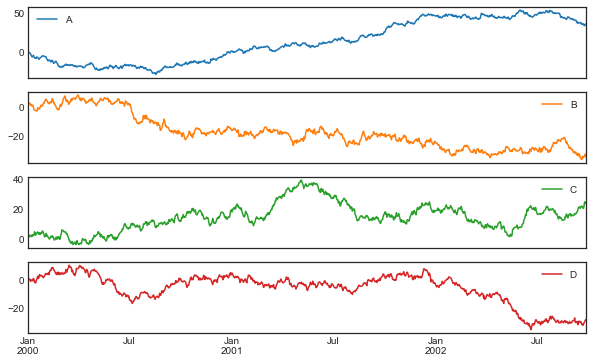

In [16]:
df.plot(subplots=True)
plt.show()

### Using layout and targeting multiple axes

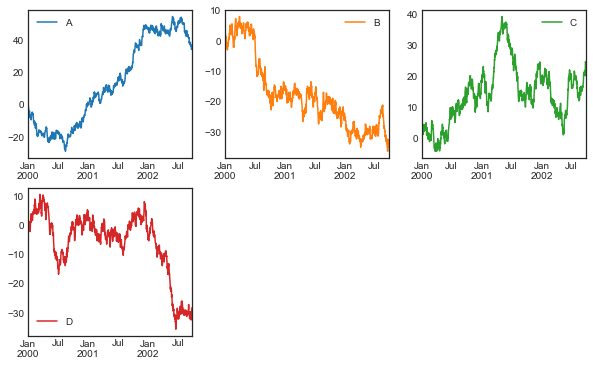

In [17]:
df.plot(
    subplots=True, 
    layout=(2, 3), 
#     figsize=(6, 6), 
    sharex=False
)
plt.show()

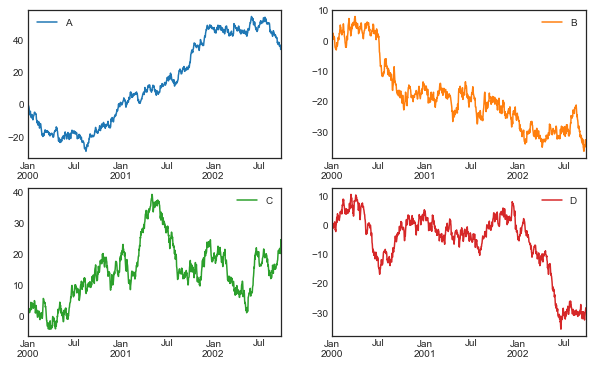

In [18]:
# The above example is identical to using:

df.plot(
    subplots=True, 
    layout=(2, -1), 
#     figsize=(6, 6), 
    sharex=False
)
plt.show()

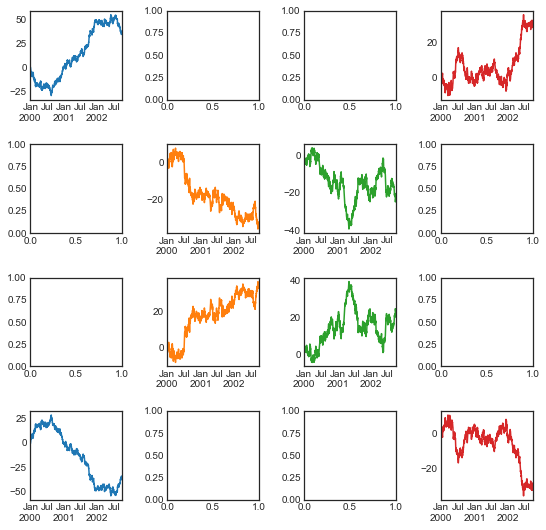

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(9, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]

df.plot(
    subplots=True, 
    ax=target1, 
    legend=False, 
    sharex=False, 
    sharey=False
)

(-df).plot(
    subplots=True, 
    ax=target2, 
    legend=False, 
    sharex=False, 
    sharey=False
)
plt.show()

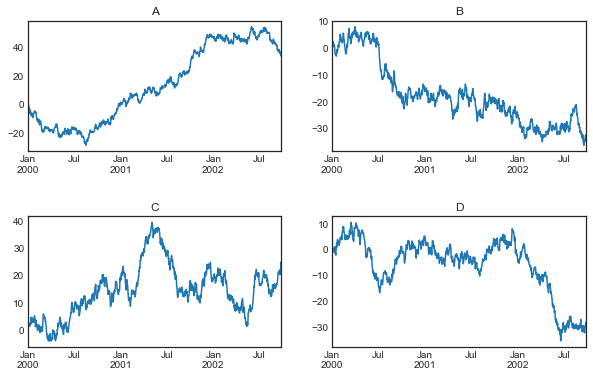

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

df["A"].plot(ax=axes[0, 0])
axes[0, 0].set_title("A")

df["B"].plot(ax=axes[0, 1])
axes[0, 1].set_title("B")

df["C"].plot(ax=axes[1, 0])
axes[1, 0].set_title("C")

df["D"].plot(ax=axes[1, 1])
axes[1, 1].set_title("D")

plt.show()

### Plotting with error bars

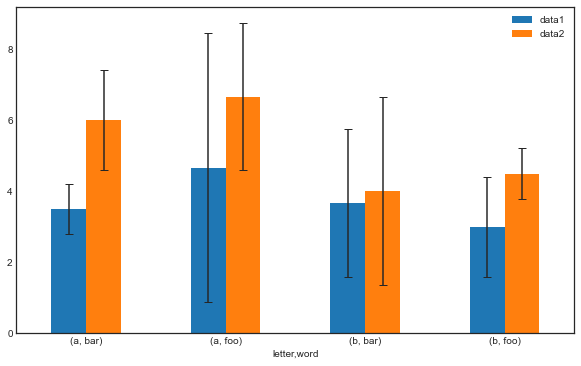

In [21]:
ix3 = pd.MultiIndex.from_arrays(
    [
        ["a", "a", "a", "a", "a", "b", "b", "b", "b", "b"],
        ["foo", "foo", "foo", "bar", "bar", "foo", "foo", "bar", "bar", "bar"],
    ],
    names=["letter", "word"]
)

df3 = pd.DataFrame(
    {
        "data1": [9, 3, 2, 4, 3, 2, 4, 6, 3, 2],
        "data2": [9, 6, 5, 7, 5, 4, 5, 6, 5, 1]
    },
    index=ix3
)

# Group by index labels and take the means and standard deviations for each group
gp3 = df3.groupby(level=("letter", "word"))

means = gp3.mean()
errors = gp3.std()

# Plot
fig, ax = plt.subplots()
means.plot.bar(
    yerr=errors, 
    ax=ax, 
    capsize=4, 
    rot=0
)
plt.show()

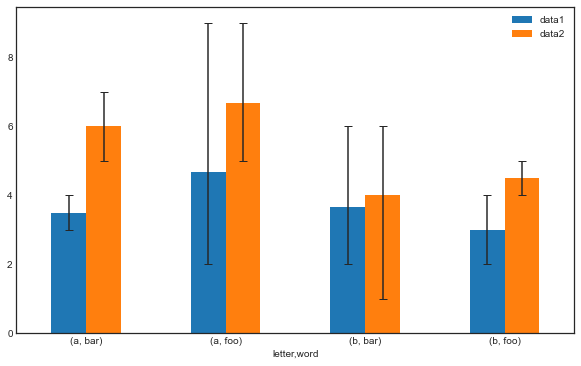

In [22]:
# Asymmetrical error bars are also supported, 
# however raw error values must be provided in this case.

mins = gp3.min()
maxs = gp3.max()

# errors should be positive, and defined in the order of lower, upper
errors = [[means[c] - mins[c], maxs[c] - means[c]] for c in df3.columns]

# Plot
fig, ax = plt.subplots()
means.plot.bar(
    yerr=errors, 
    ax=ax, 
    capsize=4, 
    rot=0
)
plt.show()

### Plotting tables

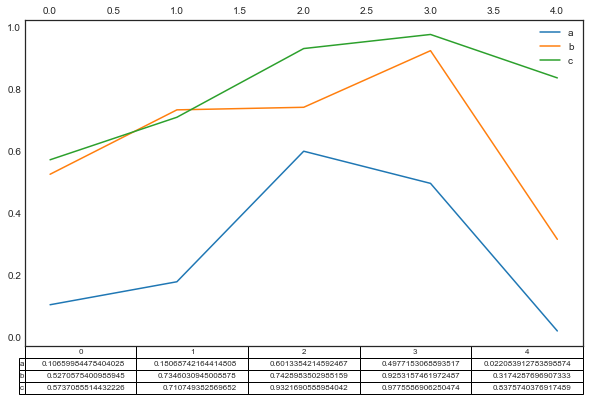

          a         b         c
0  0.106600  0.527058  0.573709
1  0.180687  0.734603  0.710749
2  0.601335  0.742898  0.932169
3  0.497715  0.925316  0.977559
4  0.022084  0.317429  0.837574


In [23]:
df = pd.DataFrame(
    np.random.rand(5, 3), 
    columns=["a", "b", "c"]
)

fig, ax = plt.subplots(1, 1)
df.plot(
    table=True, 
    ax=ax
)
ax.xaxis.tick_top()  # Display x-axis ticks on top.
plt.show()

print(df.head())

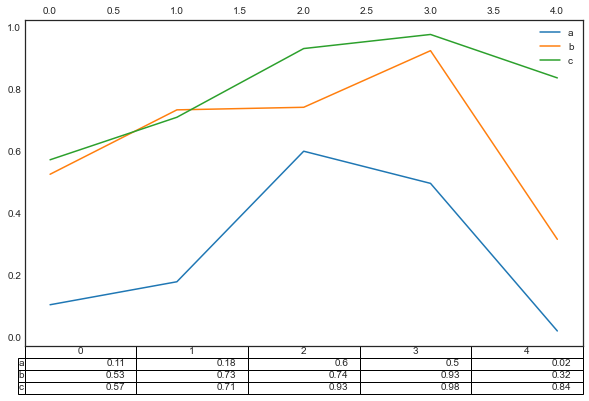

In [24]:
# Also, you can pass a different DataFrame or Series to the table keyword. 

fig, ax = plt.subplots(1, 1)
df.plot(
    table=np.round(df.T, 2), 
    ax=ax
)
ax.xaxis.tick_top()  # Display x-axis ticks on top.
plt.show()

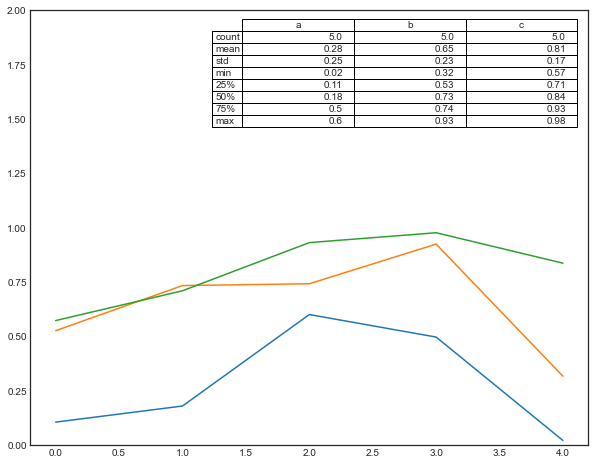

In [25]:
# There also exists a helper function pandas.plotting.table, 
# which creates a table from DataFrame or Series, 
# and adds it to an matplotlib.Axes instance. 
# This function can accept keywords which the matplotlib table has.

from pandas.plotting import table

fig, ax = plt.subplots(1, 1, figsize=(10,8))
table(
    ax, 
    np.round(df.describe(), 2), 
    loc="upper right", 
    colWidths=[0.2, 0.2, 0.2]
)
df.plot(
    ax=ax, 
    ylim=(0, 2), 
    legend=None
)
plt.show()

https://matplotlib.org/stable/api/axes_api.html

### Colormaps

https://matplotlib.org/stable/api/cm_api.html

https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html

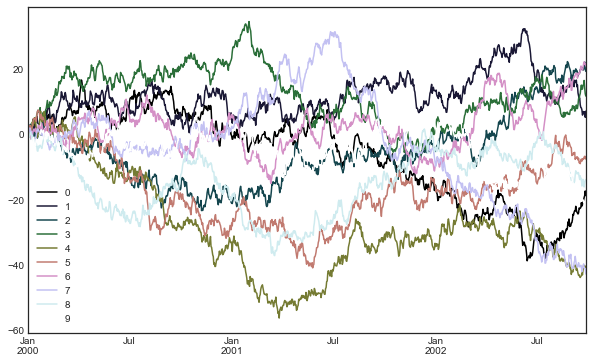

In [26]:
df = pd.DataFrame(
    np.random.randn(1000, 10), 
    index=ts.index
).cumsum()

df.plot(colormap="cubehelix")
plt.show()

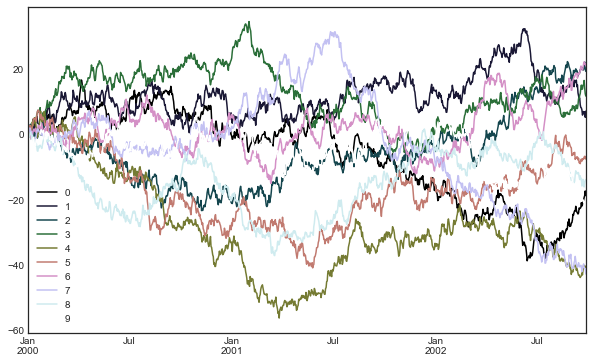

In [27]:
from matplotlib import cm

df.plot(colormap=cm.cubehelix)
plt.show()

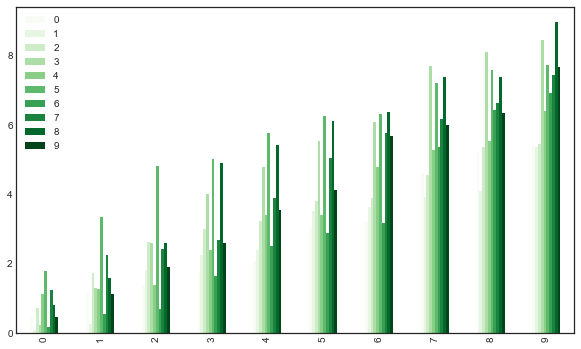

In [28]:
dd = pd.DataFrame(
    np.random.randn(10, 10)
).applymap(abs).cumsum()

dd.plot.bar(colormap="Greens")
plt.show()

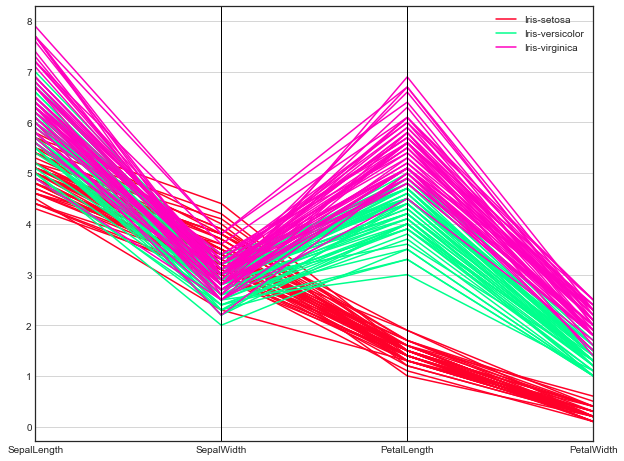

In [29]:
from pandas.plotting import parallel_coordinates

url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv"
data = pd.read_csv(url)

plt.figure(figsize=(10,8))
parallel_coordinates(data, "Name", colormap="gist_rainbow")
plt.show()

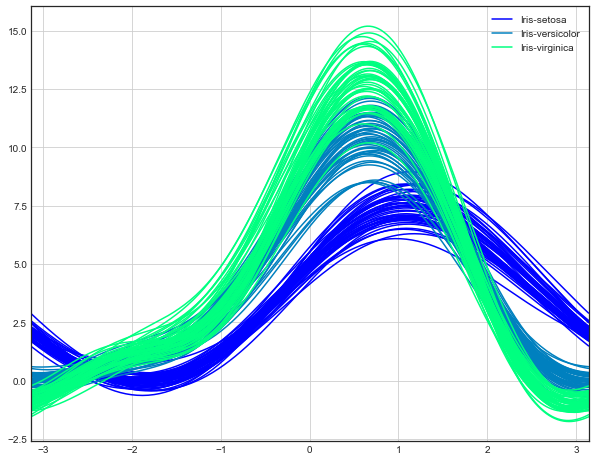

In [30]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(10,8))
andrews_curves(data, "Name", colormap="winter")
plt.show()